# Understanding AWQ, GPTQ and RTN Quantization
Built by Trelis. Find us on [YouTube](https://YouTube.com/@TrelisResearch), [GitHub](https://github.com/TrelisResearch), [HuggingFace](https://huggingface.co/Trelis).

## Run AWQ with AutoAWQ

In [1]:
# # Build from scratch (takes 10 mins)
# !git clone https://github.com/casper-hansen/AutoAWQ
# %cd AutoAWQ
# !pip install -e .
# %cd ../

# Quick Install - not the latest version
!pip install autoawq

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.4/17.4 MB 81.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 95.3 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 92.4 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.1/258.1 kB 121.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 101.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 100.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.6/311.6 kB 130.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 128.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 771.9/771.9 kB 107.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 95.2 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 96.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.3/78.3 kB 49.5 MB/s eta 0:00:00

In [2]:
!pip install git+https://github.com/huggingface/transformers.git

  Cloning https://github.com/huggingface/transformers.git to /tmp/pip-req-build-6wtd95ih
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/transformers.git /tmp/pip-req-build-6wtd95ih
  Resolved https://github.com/huggingface/transformers.git to commit 245da7ed38d9f0dbd428c48e2ec4111ae5be2680
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached tokenizers-0.14.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (3.8 MB)
  Using cached huggingface_hub-0.16.4-py3-none-any.whl (268 kB)
  Created wheel for transformers: filename=transformers-4.34.0.dev0-py3-none-any.whl size=7745696 sha256=7dc0995bc5f44c668083223845fe063255cb35b1b835f7b7e744a037e519d5b2
  Stored in directory: /tmp/pip-ephem-wheel-cache-a10162bp/wheels/e7/9c/5b/e1a9c8007c343041e61cc484433d512ea9274272e3fcbe7c16
Successfully built transformers
  Attempting uninstall: huggingface-hub
  

In [3]:
## Load AWQ Model

from awq import AutoAWQForCausalLM
from transformers import AutoTokenizer

### Note that the model must be in safetensors format!

# model_name_or_path = "TheBloke/Llama-2-7b-Chat-AWQ"
model_name_or_path = "Trelis/Llama-2-13b-chat-longlora-32k-sft-AWQ"

# Load model
model = AutoAWQForCausalLM.from_quantized(model_name_or_path, fuse_layers=True,
                                          trust_remote_code=False, safetensors=True)

tokenizer = AutoTokenizer.from_pretrained(model_name_or_path, trust_remote_code=False)

Fetching 9 files:   0%|          | 0/9 [00:00<?, ?it/s]

Replacing layers...: 100%|██████████| 40/40 [00:06<00:00,  6.63it/s]
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [1]:
# ## Load model in bf16

# from transformers import AutoTokenizer, AutoModelForCausalLM
# import torch

# model_name_or_path = "Yukang/Llama-2-13b-chat-longlora-32k-sft"

# # Load model
# model = AutoModelForCausalLM.from_pretrained(model_name_or_path, torch_dtype=torch.float16,
#                                           trust_remote_code=True, device_map='cuda')

# tokenizer = AutoTokenizer.from_pretrained(model_name_or_path, trust_remote_code=False)

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

In [6]:
# Set the length limit for the material, in characters
len_char = 16000

# Read the content from the file 'berkshire.txt'
with open('berkshire23.txt', 'r') as file:
    content = file.read()

# Shorten the content to 'len_char' characters
material = content[:len_char]

In [8]:
prompt = f"Below is a material. Memorize the material and answer my question after the material.\n {material} \n Can you provide a one sentence summary of the material?"

tokens = tokenizer(
    prompt,
    return_tensors='pt'
).input_ids.cuda()

# Generate output
generation_output = model.generate(
    tokens,
    do_sample=False,
    max_new_tokens=512
)

print(tokenizer.decode(generation_output[0], skip_special_tokens=True).strip())

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
This is a friendly reminder - the current text generation call will exceed the model's predefined maximum length (4096). Depending on the model, you may observe exceptions, performance degradation, or nothing at all.


Below is a material. Memorize the material and answer my question after the material.
 we are here live in Omaha Nebraska good morning everybody I'm Becky quick
along with Mike santoli and in just 30 minutes time Berkshire Hathaway chairman and CEO Warren Buffett's going to be
taking the stage with his vice chair Charlie Munger the legendary duo will also be joined by berkshire's two other
Vice chairs Greg Abel who manages the non-insurance operations for the company and Ajit Jain who runs all of the
insurance businesses and as always it's pretty big crowd here lots and lots of people and a few people you might notice
too Tim Cook is here Apple of course is still berkshire's largest holding big big part of its portfolio there you see
him backstage getting ready to go out and take his seat he gets to sit down in the special seats by the way that's
Debbie pasonic Warren's assistant who's standing by just went bite beside him also in the crowd Bill Murray he has
been here for a couple of 

# Quantize with AWQ

In [1]:
# Required when training models/data that are gated on HuggingFace, and required for pushing models to HuggingFace
!pip install huggingface_hub
from huggingface_hub import notebook_login

notebook_login()


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python -m pip install --upgrade pip


In [2]:
from awq import AutoAWQForCausalLM
from transformers import AutoTokenizer
import torch

model_path = 'Yukang/Llama-2-13b-chat-longlora-32k-sft'

quant_name = model_path.split('/')[-1] + "-AWQ"  # Splits by '/' and takes the last element

quant_path = 'Trelis/' + quant_name
quant_config = { "zero_point": True, "q_group_size": 128, "w_bit": 4 }

# Load model
model = AutoAWQForCausalLM.from_pretrained(model_path, device_map='auto')
tokenizer = AutoTokenizer.from_pretrained(model_path, trust_remote_code=True)

# Quantize
model.quantize(tokenizer, quant_config=quant_config)

# Save quantized model
model.save_quantized(quant_name, safetensors=True, shard_size="10GB")
tokenizer.save_pretrained(quant_name)

Fetching 11 files:   0%|          | 0/11 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

Repo card metadata block was not found. Setting CardData to empty.
AWQ: 100%|██████████| 40/40 [24:53<00:00, 37.34s/it]


('Llama-2-13b-chat-longlora-32k-sft-AWQ/tokenizer_config.json',
 'Llama-2-13b-chat-longlora-32k-sft-AWQ/special_tokens_map.json',
 'Llama-2-13b-chat-longlora-32k-sft-AWQ/tokenizer.model',
 'Llama-2-13b-chat-longlora-32k-sft-AWQ/added_tokens.json',
 'Llama-2-13b-chat-longlora-32k-sft-AWQ/tokenizer.json')

# Push models and tokenizers to hub

## Upload model files

In [4]:
from huggingface_hub import HfApi

# Initialize the HfApi class
api = HfApi()

# Specify the path where you want the file to be uploaded in the repository
path_in_repo = "model.safetensors"
# path_in_repo = "pytorch_model.bin" ## if safetensors=False on save_quantized

local_file_path = "./" + quant_name + "/" + path_in_repo

# Generate repo_id from model path
repo_id = "Trelis/" + quant_name

# Upload the file
api.upload_file(
    path_or_fileobj=local_file_path,
    path_in_repo=path_in_repo,
    repo_id=repo_id,
    repo_type="model"  # Assuming it's a model; can be "dataset" or "space" as well
)

model.safetensors:   0%|          | 0.00/7.25G [00:00<?, ?B/s]

'https://huggingface.co/Trelis/Llama-2-13b-chat-longlora-32k-sft-AWQ/blob/main/model.safetensors'

## Upload non-model files

In [5]:
from huggingface_hub import HfApi

# Initialize the HfApi class
api = HfApi()

# Specify the repository where you want to upload the files
repo_id = "Trelis/" + quant_name

# Array of local file paths you want to upload
local_file_paths = [
    "./" + quant_name + "/config.json",
    "./" + quant_name + "/generation_config.json",
    "./" + quant_name + "/quant_config.json",
    "./" + quant_name + "/special_tokens_map.json",
    "./" + quant_name + "/tokenizer_config.json",
    "./" + quant_name + "/tokenizer.json"
]

# Loop through each file and upload it
for local_file_path in local_file_paths:
    # Extract the file name from the local file path
    file_name = local_file_path.split("/")[-1]

    # Specify the path where you want the file to be uploaded in the repository
    path_in_repo = file_name  # Using file_name directly, adjust as needed

    # Upload the file
    api.upload_file(
        path_or_fileobj=local_file_path,
        path_in_repo=path_in_repo,
        repo_id=repo_id,
        repo_type="model",  # Assuming it's a model; can be "dataset" or "space" as well
    )
    print(f"Uploaded {file_name} to {repo_id}")


Uploaded config.json to Trelis/Llama-2-13b-chat-longlora-32k-sft-AWQ
Uploaded generation_config.json to Trelis/Llama-2-13b-chat-longlora-32k-sft-AWQ
Uploaded quant_config.json to Trelis/Llama-2-13b-chat-longlora-32k-sft-AWQ
Uploaded special_tokens_map.json to Trelis/Llama-2-13b-chat-longlora-32k-sft-AWQ
Uploaded tokenizer_config.json to Trelis/Llama-2-13b-chat-longlora-32k-sft-AWQ
Uploaded tokenizer.json to Trelis/Llama-2-13b-chat-longlora-32k-sft-AWQ


## Vector and Matrix Setup

Consider a weight matrix, W, an input vector, v and an output activation vector, a.



In [ ]:
# Define a weight matrix

W = [[9, 0, 0], [0, 4, 0], [0, 0, 1]]

for row in W:
    for element in row:
        print(element, end=' ')
    print()  # Move to the next line after each row

9 0 0 
0 4 0 
0 0 1 


In [ ]:
# Define an input vector
v = [1,2,3]
print(v)

[1, 2, 3]


In [ ]:
a = [0] * len(W)  # Initialize the output vector with zeros

for i in range(len(W)):
    for j in range(len(W[i])):
        a[i] += W[i][j] * v[j]

print("Output vector a:", a)

Output vector a: [9, 8, 3]


## Round to Nearest Quantization
Quantizing to 2 bits. Assuming all numbers are positive.

Start with no scaling of the levels.

In [ ]:
levels = [0, 1, 2, 3]  # 2-bit quantization levels; 00, 01, 10, 11

def quantize(matrix, levels):
    quantized_matrix = []
    for row in matrix:
        quantized_row = []
        for element in row:
            # Round to nearest level
            quantized_element = min(levels, key=lambda x:abs(x-element))
            quantized_row.append(quantized_element)
        quantized_matrix.append(quantized_row)
    return quantized_matrix

W_quantized = quantize(W, levels)

print(f"Levels: {levels}")

print("\nRaw W:\n")

for row in W:
    for element in row:
        print(element, end=' ')
    print()  # Move to the next line after each row

print("\nQuantized W using RTN:\n")

for row in W_quantized:
    for element in row:
        print(element, end=' ')
    print()  # Move to the next line after each row

Levels: [0, 1, 2, 3]

Raw W:

9 0 0 
0 4 0 
0 0 1 

Quantized W using RTN:

3 0 0 
0 3 0 
0 0 1 


Now repeat this but adding a scaling factor before quantization.

In [ ]:
import numpy as np

# Original weight matrix and input vector
W = np.array([[9, 0, 0], [0, 4, 0], [0, 0, 1]])
v = np.array([1, 2, 3])

# Define levels for 2-bit quantization
levels = np.array([0, 1, 2, 3])

# Define a scaling factor
s = 0.33

# Function to quantize a matrix
def quantize(matrix, levels):
    return np.array([min(levels, key=lambda x: abs(x - element)) for row in matrix for element in row]).reshape(matrix.shape)

# Scale the weight matrix
W_scaled = W * s

# Quantize the scaled weight matrix
W_quantized = quantize(W_scaled, levels)

# Calculate the activation using the original and quantized weight matrix
raw_activation = np.dot(W, v)
quantized_activation = np.dot(W_quantized, v)

# Apply the inverse scaling factor to the activation from the quantized weight matrix
scaled_quantized_activation = quantized_activation / s

# Calculate the activation error
error_raw_vs_quantized = np.linalg.norm(raw_activation - scaled_quantized_activation)

print(f"Levels: {levels}")
print("\nOriginal W:")
print(W)
print(f"\nOriginal W scaled by {s}:")
W_scaled = s*W
print(W_scaled)
print("\nScaled and Quantized W:")
print(W_quantized)
print("\nRaw activation:", raw_activation)
print("\nScaled Quantized activation:", scaled_quantized_activation)
print("\nActivation error (Raw vs Scaled Quantized):", error_raw_vs_quantized)

Levels: [0 1 2 3]

Original W:
[[9 0 0]
 [0 4 0]
 [0 0 1]]

Original W scaled by 0.33:
[[2.97 0.   0.  ]
 [0.   1.32 0.  ]
 [0.   0.   0.33]]

Scaled and Quantized W:
[[3 0 0]
 [0 1 0]
 [0 0 0]]

Raw activation: [9 8 3]

Scaled Quantized activation: [9.09090909 6.06060606 0.        ]

Activation error (Raw vs Scaled Quantized): 3.573445580244347


How best to pick the scaling factor?
- RTN = pick based on max weight minus min weight
- AWQ = optimise based on activation errors
- GPTQ = quantize a weight in a channel, and then try to adjust the other weights to balance out any error caused. (for best performance, approach in the order of decreasing activation)



## Quantization with AWQ = Activation-aware Weight Quantization
2-bit, assuming positive numbers only.

With AWQ, the idea is to choose a scaling factor that minimises the activation errors.

With RTN, you just pick a scaling factor that maps the quantization levels to the min and max values of the W matrix.

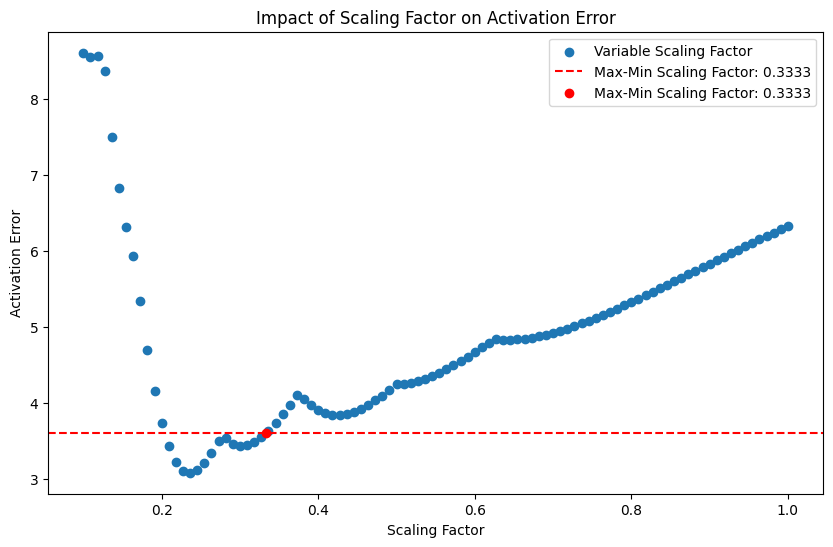

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function to quantize a matrix
def quantize(matrix, levels):
    return np.array([min(levels, key=lambda x: abs(x - element)) for row in matrix for element in row]).reshape(matrix.shape)

# Original weight matrix and input vector
W = np.array([[9, 0, 0], [0, 4, 0], [0, 0, 1]])
v = np.array([1, 2, 3])

# Define levels for 2-bit quantization
levels = np.array([0, 1, 2, 3])

# Calculate scaling factor based on max-min weight values
s_max_min = (np.max(levels) - np.min(levels)) / (np.max(W) - np.min(W))

# Define a function to calculate the activation error given a scaling factor
def calculate_activation_error(W, v, s, levels):
    W_scaled = W * s
    W_quantized = quantize(W_scaled, levels)
    raw_activation = np.dot(W, v)
    quantized_activation = np.dot(W_quantized, v)
    scaled_quantized_activation = quantized_activation / s
    return np.linalg.norm(raw_activation - scaled_quantized_activation)

# Initialize an array to hold scaling factors and corresponding errors
s_values = np.linspace(0.1, 1, 100)
errors = []

# Calculate the error for each scaling factor
for s in s_values:
    error = calculate_activation_error(W, v, s, levels)
    errors.append(error)

# Calculate the error for the scaling factor based on max-min
error_max_min = calculate_activation_error(W, v, s_max_min, levels)

# Plot the results
# Plot the results with dots instead of a line
plt.figure(figsize=(10, 6))
plt.scatter(s_values, errors, label='Variable Scaling Factor', marker='o')
plt.axhline(y=error_max_min, color='r', linestyle='--', label=f'Max-Min Scaling Factor: {s_max_min:.4f}')
plt.scatter(s_max_min, error_max_min, color='r', zorder=5, label=f'Max-Min Scaling Factor: {s_max_min:.4f}')
plt.xlabel('Scaling Factor')
plt.ylabel('Activation Error')
plt.title('Impact of Scaling Factor on Activation Error')
plt.legend()
plt.show()

## Notes on GPTQ

You can add GPTQ on top of AWQ.

GPTQ involves quantizing weights one by one, and then adjusting the other weights to minimise the quantization error.

## Notes on Data Dependence

GPTQ is quite data dependent because it uses a dataset to do the corrections.

AWQ is data dependent because data is needed to choose the best scaling based on activation (remember activations require W and v (the inputs)).

RTN is not data dependent, so is maybe more robust in some broader sense.

Perhaps a geometric type of RTN could be most robust (instead of a linear RTN).

## Notes on Speed

Inference speed isn't to do with choosing the right scaling factor.

Inference is about setting up matrix multiplications to be efficient.

Historically, a lot of multiplications would be matrix-vector (e.g. GPTQ).

AWQ sets up multiplications as matrix - matrix. This better leverages matrix - matrix capabilities of modern GPUs and gets more speed.